In [1]:
import os
import cv2
from tqdm import tqdm 
import numpy as np
import matplotlib.pyplot as plt
import random


# Load Images from Folder & Return List

In [2]:
def processImage(dir,categories):
    data=[]    
    IMG_SIZE=32
    
    for category in categories:
        path=os.path.join(dir,category)
        class_index=categories.index(category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                resized_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                data.append([resized_array,class_index])
            except Exception as e:
                pass
    return data


In [3]:
DATADIR="H:\mine\Test"
CATEGORIES=["Ahanaf","Jarif"]

dataList=processImage(DATADIR,CATEGORIES)



100%|██████████| 38/38 [00:03<00:00, 11.19it/s]


In [4]:
len(dataList)

65

In [5]:
x=[]
y=[]

random.shuffle(dataList)

for features,label in dataList:
    x.append(features)
    y.append(label)


In [6]:
# Convert to numpy array
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(65, 32, 32)
(65,)


# Save Dataset using Numpy

In [11]:
np.savez_compressed('ahanaf_zarif.npz',x,y)

# Load Dataset using Numpy

In [12]:
dataset=np.load('ahanaf_zarif.npz')

In [23]:
x,y=dataset['arr_0'],dataset['arr_1']
print(x.shape)
print(y.shape)

(65, 32, 32)
(65,)


# Save Data into Pcikle

In [53]:
import pickle 

# save this data for further use
pickle_out = open("x.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


# Load from Pickle

In [ ]:
pickle_in = open("x.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

# Load Single Image

In [16]:
def loadImage(path,size):
    imgArray=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    imgArray=cv2.resize(imgArray,(size,size))
                        
    return imgArray

img=loadImage("F:/TensorFlow/TestImage/1.jpeg",200)
img.shape
    

(200, 200)

# Show Image

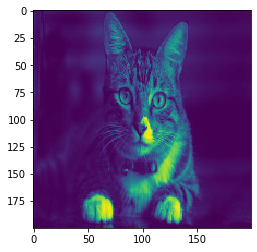

In [24]:
plt.imshow(img)
plt.show()

# Image Load Using PIL

In [24]:
from PIL import Image

In [30]:
image=Image.open("F:/TensorFlow/TestImage/1.jpeg")

In [31]:
type(image)

PIL.JpegImagePlugin.JpegImageFile

In [32]:
image=image.convert('RGB')

In [33]:
type(image)

PIL.Image.Image

In [41]:
image=image.resize((32,32))

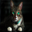

In [42]:
image

In [43]:
image=np.asarray(image)

In [45]:
image.shape

(32, 32, 3)